<a href="https://colab.research.google.com/github/aburak256/Currency-with-Twitter/blob/main/Twint_turkish_lira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-z6om835s/twint
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-z6om835s/twint
  Running command git checkout -q origin/master
  Created wheel for twint: filename=twint-2.1.21-cp36-none-any.whl size=38761 sha256=5b72d3798deb9f7b506792cb478d55eefa246b5fb219fe5e0007384f48a99861
  Stored in directory: /tmp/pip-ephem-wheel-cache-9nybpi9v/wheels/4f/3b/75/62d04b3b446658ba85401e8868d3cd1d4bc22f17ad755460a6
Successfully built twint
  Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
# Solve compatibility issues with notebooks and RunTime errors.
import nest_asyncio
import csv
import twint
import time
nest_asyncio.apply()

In [2]:
with open('Last.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    temp = "2014-01-01 19:00:00"
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
            continue
        elif (line_count % 150) == 0:
          line_count += 1
          date = row[0] + ":00"                                                 #current hour with date inside
          prev_date = temp

          temp = date

          c = twint.Config()
          
          c.Search = "Türk Lirasi"
          c.Count = True
          c.Lang = "tr"
          c.Since = prev_date
          c.Until = date
          c.Output = "Results"
          c.Store_csv = True
          c.Store_object = True
          twint.run.Search(c)

          tweetlist = twint.output.tweets_list ##Getting the list of tweets collected

          # total_likes, total_counts, total_retweets = 0, 0, 0
          # for i in range(len(tweetlist)):
          #   total_likes += tweetlist[i].likes_count
          #   total_retweets += tweetlist[i].retweets_count
          #   total_counts += 1 
          # print(total_likes, total_counts, total_retweets)

          for i in range(len(tweetlist)):
            twint.output.tweets_list.pop()

          # with open('Dollar_change.csv',mode = 'a',newline='') as change_file:
          #     writer = csv.writer(change_file)
          #     writer.writerow([total_counts, total_likes, total_retweets])

        else:
          line_count += 1

        # date = row[0] + ":00"                                                 #current hour with date inside
        # prev_date = temp                                                      #previous hour with date inside
        # line_count += 1

        # originalsplitted = date.split(" ")
        # originalsplittedDate = originalsplitted[0].split("-")
        # originalsplittedHour = originalsplitted[1].split(":")

        # prevsplitted = prev_date.split(" ")
        # prevsplittedDate = prevsplitted[0].split("-")
        # prevsplittedHour = prevsplitted[1].split(":")

        # if int(originalsplittedDate[2]) - int( prevsplittedDate[2]) == 2:
        #   prev_date = originalsplitted[0] + " " + "16:00:00"

        # temp = date
        # print(prev_date, date, line_count)                                                
        
        
        
    print(f'Processed {line_count} lines.')

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1165269284647575553 2019-08-24 14:27:01 +0000 <halilbtekin> @filiz175 4 memurun yaptığı işi yapıyorum sürekli işçi kadrosundayım 2546 türk lirası elime geçen maaş ama gel görki gör işte ne diyim
1165265472973082625 2019-08-24 14:11:52 +0000 <zazavun> bu arada Dolar 5,76 Türk Lirası fazla bir hareketlilik yok ama ALTIN alanlar köşeyi döndü son 10 içinde altın acayip fırladı...   ( Tammy Abraham Pukki Diyarbakır'ın Dicle Quaresma'ya Norwich 7 Haziran Lampard Türkiye'nin Oscar Mount Şükrü Hanedar )  https://t.co/WIf5MdHeCS
1165259602998333445 2019-08-24 13:48:33 +0000 <KibrisMedya> Girne’de fırına 2 bin 128 Türk Lirası para cezası kesildi  https://t.co/G6YUeobIBo  https://t.co/M5VvJk017K
1165256638972006403 2019-08-24 13:36:46 +0000 <ErsenZaman> Yerli ve milli skiyorlar 1 kilo tiryaki çay 34 tl otuzdört Türk lirası
1165254741519216640 2019-08-24 13:29:14 +0000 <DVeyd3> beni tatmin edecek rakam 500 türk lirası.. naptılar da tatmin olmadınız
11

In [3]:
import os
import glob
import pandas as pd
import sys
import csv
from itertools import islice
import json

In [4]:
fout=open("out.csv","a")
# first file:
for line in open("tweets (9).csv"):
    fout.write(line)
# now the rest:    
for num in range(2,201):
    f = open("tweets (10).csv")
    f.__next__() # skip the header
    for line in f:
         fout.write(line)
    f.close() # not really needed
fout.close()

In [4]:
with open('tweets.csv','r') as in_file, open('removed_duplicates.csv','w') as out_file:
    seen = set() # set for fast O(1) amortized lookup
    for line in in_file:
        if line in seen: continue # skip duplicate

        seen.add(line)
        out_file.write(line)

In [5]:
line_count = 0
with open('removed_duplicates.csv','r') as in_file:
  for line in in_file:
    line_count += 1
  print(line_count)

95660


In [6]:
with open('removed_duplicates.csv', 'r', newline='') as f_input:
    csv_input = csv.DictReader(f_input)
    data = sorted(csv_input, key=lambda row: (row['created_at'], row['id']))

with open('output_Turk_lirasi.csv', 'w', newline='') as f_output:    
    csv_output = csv.DictWriter(f_output, fieldnames=csv_input.fieldnames)
    csv_output.writeheader()
    csv_output.writerows(data)

In [7]:
with open('output_Turk_lirasi.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    hourBy = {}
    for row in csv_reader:
      if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
            continue
      line_count += 1
      print(line_count)
      splitted = row[2].split(" ")
      if len(splitted) >= 2:
        splittedHour = splitted[1].split(":")

        date = splitted[0] + " " + splittedHour[0]

        if date in hourBy:
          valuesOfHour = hourBy[date]
          print(date, valuesOfHour)
          valuesOfHour[0] += 1
          valuesOfHour[1] += int(row[17])
          valuesOfHour[2] += int(row[16])
        else:
          hourBy[date] = [1, int(row[17]), int(row[16])]
      
    

Görüntülenen çıkış son 5000 satıra kısaltıldı.
2019-10-14 19 [1, 0, 0]
92531
2019-10-14 19 [2, 0, 0]
92532
2019-10-14 19 [3, 0, 1]
92533
2019-10-14 19 [4, 131, 14]
92534
2019-10-14 19 [5, 131, 14]
92535
92536
2019-10-14 20 [1, 0, 0]
92537
2019-10-14 20 [2, 0, 0]
92538
2019-10-14 20 [3, 0, 0]
92539
2019-10-14 20 [4, 1, 0]
92540
2019-10-14 20 [5, 1, 0]
92541
92542
2019-10-14 21 [1, 3, 0]
92543
92544
92545
92546
92547
2019-10-15 05 [1, 2, 0]
92548
92549
92550
2019-10-15 07 [1, 0, 0]
92551
2019-10-15 07 [2, 0, 0]
92552
2019-10-15 07 [3, 0, 0]
92553
2019-10-15 07 [4, 16, 0]
92554
92555
2019-10-15 08 [1, 0, 0]
92556
2019-10-15 08 [2, 46, 19]
92557
92558
2019-10-15 10 [1, 0, 0]
92559
2019-10-15 10 [2, 2, 0]
92560
92561
2019-10-15 11 [1, 0, 0]
92562
2019-10-15 11 [2, 0, 0]
92563
2019-10-15 11 [3, 1, 0]
92564
2019-10-15 11 [4, 1, 0]
92565
2019-10-15 11 [5, 1, 0]
92566
92567
92568
92569
2019-10-15 14 [1, 1, 0]
92570
2019-10-15 14 [2, 1, 0]
92571
2019-10-15 14 [3, 1, 0]
92572
2019-10-15 14 [4, 1,

In [15]:
with open('dictout.txt', 'w') as file:
     file.write(json.dumps(hourBy))

In [8]:
with open('Last.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    temp = "2014-01-01 20"
    for row in csv_reader:
      if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
            continue
      date = row[0]                                                         #current hour with date inside
      prev_date = temp                                                      #previous hour with date inside
      line_count += 1

      originalsplitted = date.split(" ")
      originalsplittedDate = originalsplitted[0].split("-")
      originalsplittedHour = originalsplitted[1].split(":")
      originalsplittedHour[0] = int(originalsplittedHour[0]) + 3

      if  originalsplittedHour[0] == 24 or originalsplittedHour[0] == 25 or originalsplittedHour[0] == 26:
        originalsplittedHour[0] = (originalsplittedHour[0]) - 24
        originalsplittedDate[2] = int(originalsplittedDate[2]) + 1
        if originalsplittedDate[2] < 10:
          originalsplittedDate[2] = "0" + str(originalsplittedDate[2])
        else:
          originalsplittedDate[2] = str(originalsplittedDate[2])
        
        if originalsplittedDate[2] == "01":
          originalsplittedDate[1] = int(originalsplittedDate[1]) + 1
          if originalsplittedDate[1] == 13:
            originalsplittedDate[0] = str(int(originalsplittedDate[0]) + 1)
            originalsplittedDate[1] = "01"
          elif originalsplittedDate[1] < 10:
            originalsplittedDate[1] = "0" +  str(originalsplittedDate[1])
          else:
            originalsplittedDate[1] = str(originalsplittedDate[1])
        
      originalsplitted[0] = originalsplittedDate[0] + "-" + originalsplittedDate[1] + "-" + originalsplittedDate[2]
      if originalsplittedHour[0] < 10:
        originalsplittedHour[0] = str(0) + str(originalsplittedHour[0])
      else:
        originalsplittedHour[0] = str(originalsplittedHour[0])

      date = originalsplitted[0] + " " + originalsplittedHour[0] + ":" + originalsplitted[1]

      prevsplitted = prev_date.split(" ")
      prevsplittedDate = prevsplitted[0].split("-")
      prevsplittedHour = prevsplitted[1].split(":")
      prevsplittedHour[0] = int(prevsplittedHour[0])

      if  prevsplittedHour[0] == 24 or prevsplittedHour[0] == 25 or prevsplittedHour[0] == 26:
        prevsplittedHour[0] = (prevsplittedHour[0]) - 24

      if prevsplittedHour[0] < 10:
        prevsplittedHour[0] = str(0) + str(prevsplittedHour[0])
      else:
        prevsplittedHour[0] = str(prevsplittedHour[0])

      prev_date = prevsplitted[0] + " " + prevsplittedHour[0]


      if int(originalsplittedDate[2]) - int( prevsplittedDate[2]) == 2:
        prev_date = originalsplitted[0] + " " + "19"
      
      total_likes, total_counts, total_retweets = 0, 0, 0
      temp = date

      print(prev_date)

      if prev_date in hourBy:
        with open('tweet_count_turkishlira.csv',mode = 'a',newline='') as change_file:
          writer = csv.writer(change_file)
          print(hourBy[prev_date])
          forprint = [prev_date, hourBy[prev_date][0],hourBy[prev_date][1], hourBy[prev_date][2]]
          writer.writerow(forprint)
      else:
        with open('tweet_count_turkishlira.csv',mode = 'a',newline='') as change_file:
          writer = csv.writer(change_file)
          print([0, 0 , 0])
          forprint = [prev_date, 0,0,0]
          writer.writerow(forprint)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
2019-08-07 13
[1, 0, 0]
2019-08-07 14
[3, 66, 8]
2019-08-07 15
[2, 1, 0]
2019-08-07 16
[6, 4, 0]
2019-08-07 17
[2, 18, 0]
2019-08-07 18
[2, 19, 0]
2019-08-07 19
[4, 3, 0]
2019-08-07 20
[4, 41, 2]
2019-08-07 21
[3, 3, 0]
2019-08-07 22
[0, 0, 0]
2019-08-07 23
[0, 0, 0]
2019-08-08 00
[1, 0, 0]
2019-08-08 01
[0, 0, 0]
2019-08-08 02
[1, 2, 1]
2019-08-08 03
[0, 0, 0]
2019-08-08 04
[1, 8, 1]
2019-08-08 05
[1, 19, 0]
2019-08-08 06
[5, 63, 2]
2019-08-08 07
[7, 21, 5]
2019-08-08 08
[7, 130, 22]
2019-08-08 09
[5, 0, 0]
2019-08-08 10
[1, 0, 0]
2019-08-08 11
[3, 2, 0]
2019-08-08 12
[1, 3, 1]
2019-08-08 13
[3, 43, 11]
2019-08-08 14
[0, 0, 0]
2019-08-08 15
[3, 64, 12]
2019-08-08 16
[2, 4, 0]
2019-08-08 17
[1, 91, 20]
2019-08-08 18
[5, 55, 9]
2019-08-08 19
[0, 0, 0]
2019-08-08 20
[2, 0, 0]
2019-08-08 21
[4, 15, 1]
2019-08-08 22
[2, 0, 0]
2019-08-08 23
[2, 3, 1]
2019-08-09 00
[0, 0, 0]
2019-08-09 01
[0, 0, 0]
2019-08-09 02
[0, 0, 0]
2019-08-09 03
[0, 0, 0]

In [ ]:
from google.colab import files
files.download('tweet_count.csv')

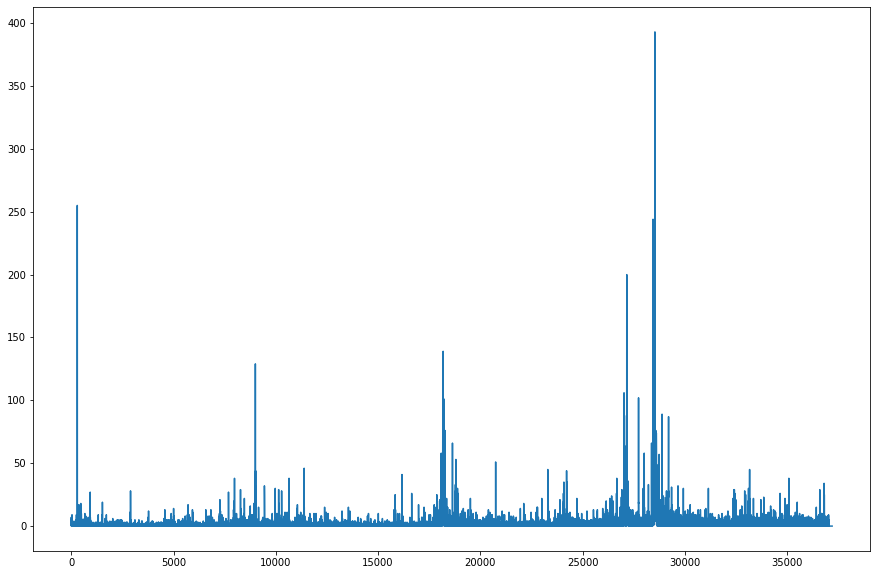

In [9]:
count = []
import matplotlib.pyplot as plt
with open('tweet_count_turkishlira.csv',mode = 'r',newline='') as change_file:
  change_reader = csv.reader(change_file, delimiter=',')
  for row in change_reader:
    count.append(int(row[1]))

plt.figure(figsize=(15, 10))
plt.plot(count)
plt.show()
          


In [4]:
line_out = 0
with open('Last.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    temp = "2018-11-12 22:19:00"
    for row in csv_reader:
      if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
            continue
      if line_count < 30123:
        line_count += 1
        continue
      elif line_count >= 30123:
        date = row[0]                                                #current hour with date inside
        prev_date = temp                                                      #previous hour with date inside
        line_count += 1

        originalsplitted = date.split(" ")
        originalsplittedDate = originalsplitted[0].split("-")
        originalsplittedHour = originalsplitted[1].split(":")
        originalsplittedHour[0] = int(originalsplittedHour[0]) + 3

        if  originalsplittedHour[0] == 24 or originalsplittedHour[0] == 25 or originalsplittedHour[0] == 26:
          originalsplittedHour[0] = (originalsplittedHour[0]) - 24
          originalsplittedDate[2] = int(originalsplittedDate[2]) + 1
          if originalsplittedDate[2] < 10:
            originalsplittedDate[2] = "0" + str(originalsplittedDate[2])
          else:
            originalsplittedDate[2] = str(originalsplittedDate[2])
          
          if originalsplittedDate[2] == "01":
            originalsplittedDate[1] = int(originalsplittedDate[1]) + 1
            if originalsplittedDate[1] == 13:
              originalsplittedDate[0] = str(int(originalsplittedDate[0]) + 1)
              originalsplittedDate[1] = "01"
            elif originalsplittedDate[1] < 10:
              originalsplittedDate[1] = "0" +  str(originalsplittedDate[1])
            else:
              originalsplittedDate[1] = str(originalsplittedDate[1])
          
        originalsplitted[0] = originalsplittedDate[0] + "-" + originalsplittedDate[1] + "-" + originalsplittedDate[2]
        if originalsplittedHour[0] < 10:
          originalsplittedHour[0] = str(0) + str(originalsplittedHour[0])
        else:
          originalsplittedHour[0] = str(originalsplittedHour[0])

        date = originalsplitted[0] + " " + originalsplittedHour[0] + ":" + originalsplitted[1]

        prevsplitted = prev_date.split(" ")
        prevsplittedDate = prevsplitted[0].split("-")
        prevsplittedHour = prevsplitted[1].split(":")
        prevsplittedHour[0] = int(prevsplittedHour[0])

        if  prevsplittedHour[0] == 24 or prevsplittedHour[0] == 25 or prevsplittedHour[0] == 26:
          prevsplittedHour[0] = (prevsplittedHour[0]) - 24

        if prevsplittedHour[0] < 10:
          prevsplittedHour[0] = str(0) + str(prevsplittedHour[0])
        else:
          prevsplittedHour[0] = str(prevsplittedHour[0])

        prev_date = prevsplitted[0] + " " + prevsplittedHour[0] + ":" + prevsplittedHour[1] + ":00"


        if int(originalsplittedDate[2]) - int( prevsplittedDate[2]) == 2:
          prev_date = originalsplitted[0] + " " + "19:00:00"
        
        total_likes, total_counts, total_retweets = 0, 0, 0
        temp = date
            
        start = line_out - 25000
        if start < 0 : start = 0

        print(prev_date, date, line_count, start, line_out)

        counter = 0
        with open('/content/drive/MyDrive/output.csv') as f_output:  
          new_reader = csv.reader(f_output, delimiter=',')
          for row in islice(new_reader, start, None):
            if line_out == 0:
              print(f'Column names are {", ".join(row)}')
              line_out += 1
              continue
            line_out += 1
            if prev_date < row[2] < date:
              total_retweets += int(row[16])
              total_likes += int(row[17])
              total_counts += 1
            elif row[2] > date:
              counter += 1
              line_out -= 1
              if counter >= 3000:
                break
          with open('tweet_count.csv',mode = 'a',newline='') as change_file:
            writer = csv.writer(change_file)
            print([total_counts, total_likes, total_retweets])
            writer.writerow([total_counts, total_likes, total_retweets])

Column names are Date, Rate, Previous, Lag1Order2
2018-11-12 22:19:00 2018-11-13 00:21:00 30124 0 0
Column names are id, conversation_id, created_at, date, time, timezone, user_id, username, name, place, tweet, language, mentions, urls, photos, replies_count, retweets_count, likes_count, hashtags, cashtags, link, retweet, quote_url, video, thumbnail, near, geo, source, user_rt_id, user_rt, retweet_id, reply_to, retweet_date, translate, trans_src, trans_dest
[7, 6, 0]
2018-11-13 00:21:00 2018-11-13 01:22:00 30125 249899 274899
[5, 31, 6]
2018-11-13 01:22:00 2018-11-13 02:23:00 30126 274904 299904
[1, 1, 0]
2018-11-13 02:23:00 2018-11-13 03:00:00 30127 274905 299905
[0, 0, 0]
2018-11-13 03:00:00 2018-11-13 04:01:00 30128 274905 299905
[1, 0, 0]
2018-11-13 04:01:00 2018-11-13 05:02:00 30129 274906 299906
[1, 0, 0]
2018-11-13 05:02:00 2018-11-13 06:03:00 30130 274907 299907
[9, 214, 12]
2018-11-13 06:03:00 2018-11-13 07:04:00 30131 274916 299916
[23, 371, 18]
2018-11-13 07:04:00 2018-11-13

KeyboardInterrupt: ignored